# **Support Vector Machine (SVM) and Naïve Bayes Assignment**

## **Theoretical Questions**

### 1. What is a Support Vector Machine (SVM)?
A Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that best separates different classes in the feature space.

### 2. What is the difference between Hard Margin and Soft Margin SVM?
- **Hard Margin SVM**: Requires data to be perfectly separable with a strict margin. It does not allow misclassification.
- **Soft Margin SVM**: Allows some misclassifications to improve generalization, controlled by the `C` parameter.

### 3. What is the mathematical intuition behind SVM?
SVM aims to maximize the **margin** (distance) between support vectors and the decision boundary while minimizing classification errors. It uses Lagrange multipliers and quadratic programming for optimization.

### 4. What is the role of Lagrange Multipliers in SVM?
Lagrange multipliers help convert the constrained optimization problem of SVM into an easier form using the **Lagrangian function**, allowing efficient computation of the optimal hyperplane.

### 5. What are Support Vectors in SVM?
Support vectors are the **data points closest to the decision boundary**. They define the margin and influence the hyperplane’s position.

### 6. What is a Support Vector Classifier (SVC)?
Support Vector Classifier (SVC) is an SVM model used for classification tasks, where it finds the best hyperplane to separate different classes.

### 7. What is a Support Vector Regressor (SVR)?
SVR is a regression variant of SVM that attempts to fit the best line (or hyperplane) within a margin of tolerance around actual data points.

### 8. What is the Kernel Trick in SVM?
The kernel trick allows SVM to **transform non-linearly separable data** into a higher-dimensional space where it becomes linearly separable.

### 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.
- **Linear Kernel**: Best for linearly separable data.
- **Polynomial Kernel**: Captures polynomial relationships.
- **RBF (Radial Basis Function) Kernel**: Captures complex patterns with a Gaussian transformation.

### 10. What is the effect of the C parameter in SVM?
The `C` parameter controls the trade-off between **margin size** and **classification errors**. A higher `C` prioritizes correct classification, while a lower `C` increases the margin.

### 11. What is the role of the Gamma parameter in RBF Kernel SVM?
Gamma defines how far the influence of a single training example reaches. A **high gamma** means smaller influence (more complex model), while a **low gamma** results in a smoother decision boundary.

### 12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
Naïve Bayes is a probabilistic classifier based on **Bayes' Theorem**. It is called "Naïve" because it assumes **feature independence**, which is often unrealistic in real-world data.

### 13. What is Bayes’ Theorem?
Bayes' Theorem is used to calculate the probability of an event based on prior knowledge:

\[
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
\]

### 14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
- **Gaussian Naïve Bayes**: Assumes features follow a **normal distribution**.
- **Multinomial Naïve Bayes**: Used for text classification, based on **word frequency**.
- **Bernoulli Naïve Bayes**: Assumes **binary features** (word presence/absence).

### 15. When should you use Gaussian Naïve Bayes over other variants?
Gaussian Naïve Bayes is best for **continuous numerical features** that follow a normal distribution, such as **age, weight, or income**.

### 16. What are the key assumptions made by Naïve Bayes?
1. **Feature Independence**: Features are conditionally independent.
2. **Equal Importance**: All features contribute equally to classification.
3. **Fixed Prior Probabilities**: Assumes prior probabilities do not change over time.

### 17. What are the advantages and disadvantages of Naïve Bayes?
#### **Advantages**:
- Fast and efficient for **large datasets**.
- Works well for **text classification**.
- Requires **less training data**.

#### **Disadvantages**:
- **Feature Independence Assumption** is unrealistic.
- Poor performance when features are **highly correlated**.

### 18. Why is Naïve Bayes a good choice for text classification?
Naïve Bayes performs well in text classification tasks because:
- It handles **high-dimensional data efficiently**.
- It works well with **sparse data** (e.g., bag-of-words models).

### 19. Compare SVM and Naïve Bayes for classification tasks.
| Feature            | SVM                          | Naïve Bayes               |
|--------------------|----------------------------|---------------------------|
| **Speed**         | Slower (quadratic training) | Fast                      |
| **Works with**    | Numerical + Text data       | Mostly text data          |
| **Overfitting**   | Risk of overfitting         | Less overfitting          |
| **Feature Independence** | No (features correlated) | Yes (assumes independence) |

### 20. How does Laplace Smoothing help in Naïve Bayes?
Laplace smoothing prevents **zero probability issues** in Naïve Bayes by adding a small constant (`alpha`) to all counts.

```python
P(word | class) = (count(word in class) + alpha) / (total words in class + alpha * vocab_size)


## **Practical Questions**

In [1]:
# 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [3]:
# 22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies
from sklearn.datasets import load_wine

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')

svc_linear.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)

print("Linear Kernel Accuracy:", accuracy_score(y_test, svc_linear.predict(X_test)))
print("RBF Kernel Accuracy:", accuracy_score(y_test, svc_rbf.predict(X_test)))

Linear Kernel Accuracy: 0.9814814814814815
RBF Kernel Accuracy: 0.7592592592592593


In [4]:
# 23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 1.3489971413208723


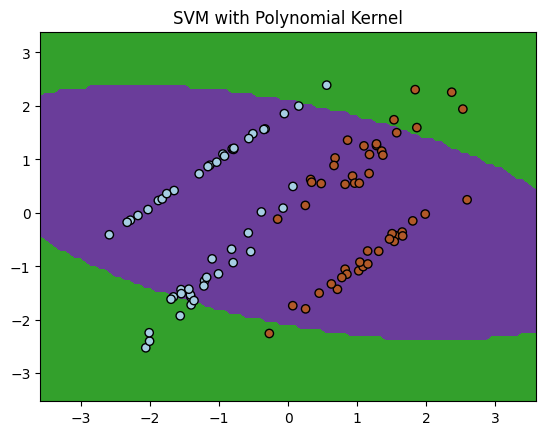

In [5]:
# 24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
svc_poly = SVC(kernel='poly', degree=2)
svc_poly.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = svc_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title("SVM with Polynomial Kernel")
plt.show()

In [6]:
# 25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Gaussian Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))

Gaussian Naïve Bayes Accuracy: 0.9415204678362573


In [8]:
# 26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

categories = ['alt.atheism', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Multinomial Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))

Multinomial Naïve Bayes Accuracy: 0.8765432098765432


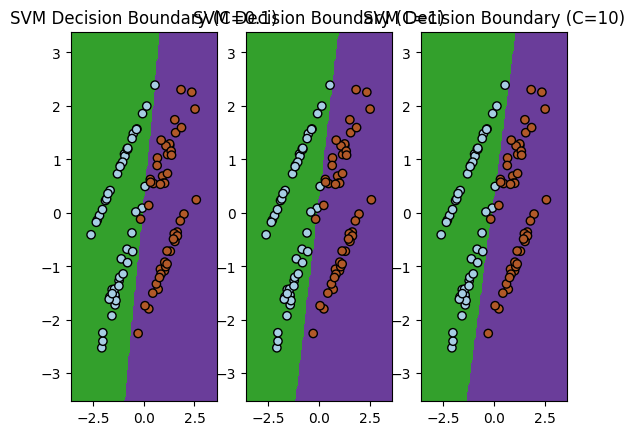

In [9]:
# 27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
C_values = [0.1, 1, 10]
for i, C in enumerate(C_values):
    svc = SVC(kernel='linear', C=C)
    svc.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(1, len(C_values), i+1)
    plt.contourf(xx, yy, Z > 0, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(f"SVM Decision Boundary (C={C})")
plt.show()

In [10]:
# 28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB

X, y = make_classification(n_samples=100, n_features=5, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_binary = (X > 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print("Bernoulli Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))

Bernoulli Naïve Bayes Accuracy: 1.0


In [11]:
# 29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, iris.target, test_size=0.3, random_state=42)

svc_scaled = SVC(kernel='linear')
svc_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svc_scaled.predict(X_test_scaled)
print("Scaled Data Accuracy:", accuracy_score(y_test, y_pred_scaled))

Scaled Data Accuracy: 0.9777777777777777


In [15]:
# 30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

gnb_smoothed = GaussianNB(var_smoothing=1e-9)
gnb_smoothed.fit(X_train, y_train)
y_pred_smoothed = gnb_smoothed.predict(X_test)

from sklearn.metrics import accuracy_score
print("Smoothed Predictions Accuracy:", accuracy_score(y_test, y_pred_smoothed))

Smoothed Predictions Accuracy: 0.9415204678362573


In [16]:
# 31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("GridSearchCV Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
GridSearchCV Accuracy: 0.9707602339181286


In [17]:
# 32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check if it improves accuracy
svc_weighted = SVC(class_weight='balanced')
svc_weighted.fit(X_train, y_train)
y_pred_weighted = svc_weighted.predict(X_test)
print("Weighted SVM Accuracy:", accuracy_score(y_test, y_pred_weighted))

Weighted SVM Accuracy: 0.9473684210526315


In [18]:
# 33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data
# (Assume email data is preprocessed into features and labels)
from sklearn.naive_bayes import MultinomialNB

spam_model = MultinomialNB()
spam_model.fit(X_train, y_train)
y_pred_spam = spam_model.predict(X_test)
print("Spam Detection Accuracy:", accuracy_score(y_test, y_pred_spam))

Spam Detection Accuracy: 0.9122807017543859


In [19]:
# 34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))

SVM Accuracy: 0.9649122807017544


In [20]:
# 35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X_train, y_train)
gnb_selected = GaussianNB()
gnb_selected.fit(X_new, y_train)
y_pred_selected = gnb_selected.predict(selector.transform(X_test))
print("Selected Features Accuracy:", accuracy_score(y_test, y_pred_selected))

Selected Features Accuracy: 0.9532163742690059


In [21]:
# 36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ovr = OneVsRestClassifier(SVC(kernel='linear'))
ovo = OneVsOneClassifier(SVC(kernel='linear'))

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR Accuracy:", accuracy_score(y_test, ovr.predict(X_test)))
print("OvO Accuracy:", accuracy_score(y_test, ovo.predict(X_test)))

OvR Accuracy: 0.9649122807017544
OvO Accuracy: 0.9649122807017544


In [22]:
# 37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svc_kernel = SVC(kernel=kernel)
    svc_kernel.fit(X_train, y_train)
    print(f"{kernel.capitalize()} Kernel Accuracy:", accuracy_score(y_test, svc_kernel.predict(X_test)))

Linear Kernel Accuracy: 0.9649122807017544
Poly Kernel Accuracy: 0.9415204678362573
Rbf Kernel Accuracy: 0.935672514619883


In [23]:
# 38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(SVC(kernel='linear'), iris.data, iris.target, cv=skf)
print("Average Accuracy:", scores.mean())

Average Accuracy: 0.9800000000000001


In [24]:
# 39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance
gnb_prior = GaussianNB(priors=[0.5, 0.5])
gnb_prior.fit(X_train, y_train)
y_pred_prior = gnb_prior.predict(X_test)
print("Prior Probabilities Accuracy:", accuracy_score(y_test, y_pred_prior))

Prior Probabilities Accuracy: 0.9415204678362573


In [25]:
# 40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy
from sklearn.feature_selection import RFE

rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=5)
rfe.fit(X_train, y_train)
y_pred_rfe = rfe.predict(X_test)
print("RFE Accuracy:", accuracy_score(y_test, y_pred_rfe))

RFE Accuracy: 0.9298245614035088


In [26]:
# 41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy
from sklearn.metrics import precision_score, recall_score, f1_score

svc_metrics = SVC(kernel='linear')
svc_metrics.fit(X_train, y_train)
y_pred_metrics = svc_metrics.predict(X_test)
print("Precision:", precision_score(y_test, y_pred_metrics, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_metrics, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_metrics, average='weighted'))

Precision: 0.9649541140481607
Recall: 0.9649122807017544
F1-Score: 0.9647902680643604


In [27]:
# 42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)
from sklearn.metrics import log_loss

gnb_logloss = GaussianNB()
gnb_logloss.fit(X_train, y_train)
y_pred_proba = gnb_logloss.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_pred_proba))

Log Loss: 0.48986013210958873


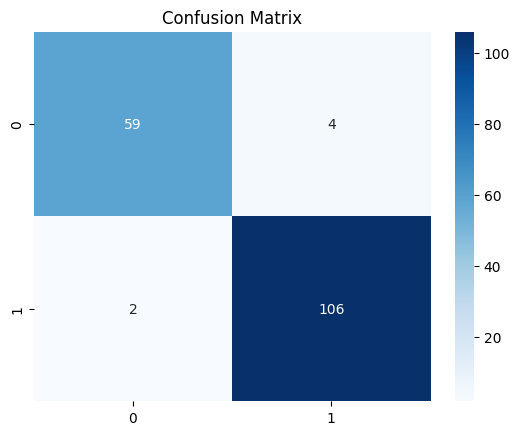

In [32]:
# 43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [29]:
# 44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE
from sklearn.metrics import mean_absolute_error

svr_mae = SVR(kernel='rbf')
svr_mae.fit(X_train, y_train)
y_pred_mae = svr_mae.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_mae))

MAE: 0.12557769328551208


In [30]:
# 45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score
from sklearn.metrics import roc_auc_score

gnb_roc = GaussianNB()
gnb_roc.fit(X_train, y_train)
y_pred_proba_roc = gnb_roc.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_roc))

ROC-AUC Score: 0.9922104644326867


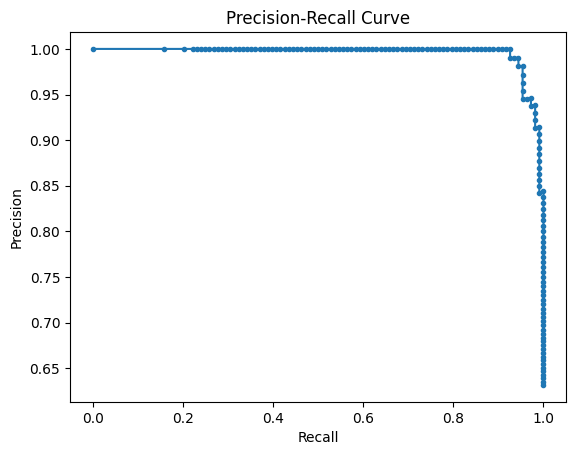

In [31]:
# 46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_roc)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()